In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns

from plot_utils import plt_single, markers, plt_correlations, plt_csv

/dfs/scratch1/mleszczy/anchor_venv2/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### Setup 

In [2]:
dims = [25, 50, 100, 200, 400, 800]
bitrates = [1,2,4,8,16,32]
sns.set_palette(reversed(sns.color_palette("Blues_d", len(bitrates))), len(bitrates))

### Load data 

In [3]:
algo = 'w2v_cbow'
csv_file = f'../results/{algo}_optimal_no_emb_norm_top_10000.csv'  
total_df_cbow = pd.read_csv(csv_file)
df_avg_cbow_no_norm = total_df_cbow.groupby(['space','bitrate','dim']).aggregate(['mean', 'std']).reset_index()

algo = 'mc'
csv_file = f'../results/{algo}_optimal_no_emb_norm_top_10000.csv'
total_df_mc = pd.read_csv(csv_file)
df_avg_mc_no_norm = total_df_mc.groupby(['space','bitrate','dim']).aggregate(['mean', 'std']).reset_index()

# Stability-Memory Tradeoff

### Individual Dimension and Precision Trends

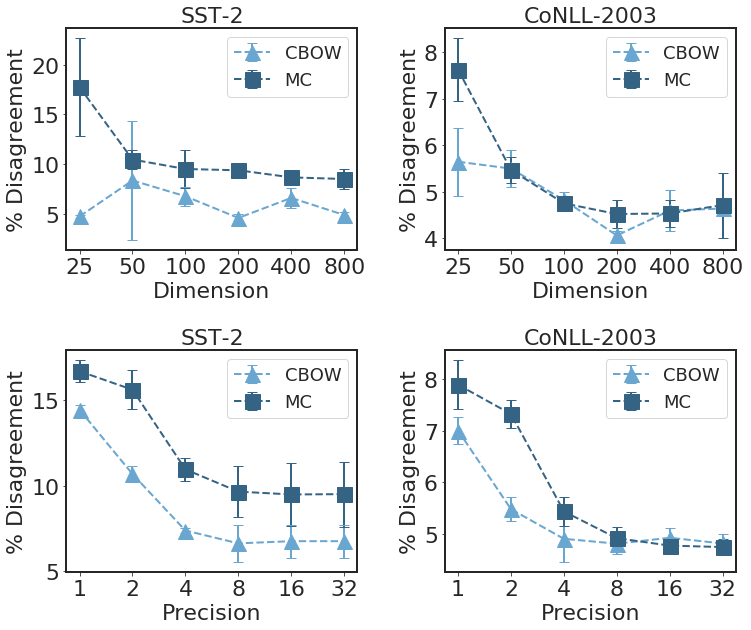

In [7]:
sns.set_style("ticks")
plt.rc('lines', markersize=15)
plt.rc('lines', linewidth=2)
plt.rc('font', size=22)
plt.rc('legend', fontsize=18)
plt.rc('axes', titlesize=22)
plt.rc('errorbar', capsize=3)
plt.rc('errorbar', capsize=3)
plt.rc('axes', linewidth=2)


fig = plt.figure(figsize=(12,10))
plt.subplots_adjust(wspace=0.3, hspace=0.45)

plt.subplot(221)
plt_single(df=df_avg_cbow_no_norm, vals=[32], val_tag='bitrate', val_tag_label='b', xtag='dim', dist='la_sst_no_emb_norm', ylabel='% Disagreement', xlabel='Dimension', title='SST-2', color='C1', marker='^', line_label='CBOW', legend=True)
plt_single(df=df_avg_mc_no_norm, vals=[32], val_tag='bitrate', val_tag_label='b', xtag='dim', dist='la_sst_no_emb_norm', ylabel='% Disagreement', xlabel='Dimension', title='SST-2', line_label='MC', legend=True)

plt.subplot(222)
plt_single(df=df_avg_cbow_no_norm, vals=[32], val_tag='bitrate', val_tag_label='b', xtag='dim', dist='rnn_no_crf_ner', ylabel='% Disagreement', xlabel='Dimension', title='CoNLL-2003', color='C1', marker='^', line_label='CBOW', legend=True)
plt_single(df=df_avg_mc_no_norm, vals=[32], val_tag='bitrate', val_tag_label='b', xtag='dim', dist='rnn_no_crf_ner', ylabel='% Disagreement', xlabel='Dimension', title='CoNLL-2003', line_label='MC', legend=True)

vals = [100]
plt.subplot(223)
plt_single(df=df_avg_cbow_no_norm, vals=vals, val_tag='dim',  xtag='bitrate', dist='la_sst_no_emb_norm', ylabel='% Disagreement', xlabel='Precision', title='SST-2', color='C1', marker='^', line_label='CBOW', legend=True)
plt_single(df=df_avg_mc_no_norm, vals=vals, val_tag='dim',  xtag='bitrate', dist='la_sst_no_emb_norm', ylabel='% Disagreement', xlabel='Precision', title='SST-2', line_label='MC', legend=True)
plt.subplot(224)
plt_single(df=df_avg_cbow_no_norm, vals=vals, val_tag='dim', xtag='bitrate', dist='rnn_no_crf_ner', ylabel='% Disagreement', xlabel='Precision', title='CoNLL-2003', color='C1', marker='^', line_label='CBOW', legend=True)
plt_single(df=df_avg_mc_no_norm, vals=vals, val_tag='dim', xtag='bitrate', dist='rnn_no_crf_ner', ylabel='% Disagreement', xlabel='Precision', title='CoNLL-2003', line_label='MC', legend=True)

### Joint Dimension/Precision Trends

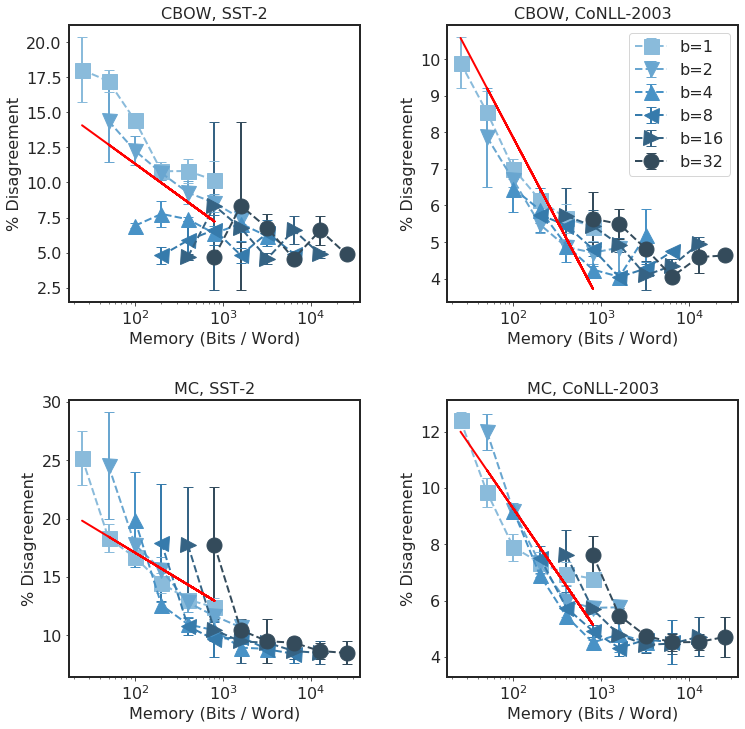

In [9]:
sns.set_style("ticks")
plt.rc('lines', markersize=5)
plt.rc('lines', linewidth=2)
plt.rc('lines', markersize=15)
plt.rc('font', size=16)
plt.rc('legend', fontsize=16)
plt.rc('axes', titlesize=16)

# y-intercepts and slope from fit_trends.py

fig = plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.3, hspace=0.35)
bitrates = [1,2,4,8,16,32]
x = total_df_cbow.loc[total_df_cbow['space'] < 1000]['space'].values
m = -1.37

df_type = df_avg_cbow_no_norm
plt.subplot(221)
plt_single(df=df_type, vals=bitrates, val_tag='bitrate',  xtag='space', dist='la_sst_no_emb_norm', ylabel='% Disagreement', val_tag_label='b', xlabel='Memory (Bits / Word)', title='CBOW, SST-2', legend=False)
plt.plot(x, m*np.log2(x)+20.44, color='r', zorder=3)

plt.subplot(222)
plt_single(df=df_type, vals=bitrates, val_tag='bitrate', xtag='space', dist='rnn_no_crf_ner', ylabel='% Disagreement', val_tag_label='b', xlabel='Memory (Bits / Word)', title='CBOW, CoNLL-2003', legend=True)
plt.plot(x, m*np.log2(x)+16.94, color='r', zorder=3)

df_type = df_avg_mc_no_norm
plt.subplot(223)
plt_single(df=df_type, vals=bitrates, val_tag='bitrate',  xtag='space', dist='la_sst_no_emb_norm', ylabel='% Disagreement', val_tag_label='b',xlabel='Memory (Bits / Word)', title='MC, SST-2', legend=False)
plt.plot(x, m*np.log2(x)+26.18, color='r', zorder=3)

plt.subplot(224)
plt_single(df=df_type, vals=bitrates, val_tag='bitrate', xtag='space', dist='rnn_no_crf_ner', ylabel='% Disagreement', val_tag_label='b',xlabel='Memory (Bits / Word)', title='MC, CoNLL-2003', legend=False)
plt.plot(x, m*np.log2(x)+18.36, color='r', zorder=3)